In [1]:
import sys
sys.path.append("..")

from algorithms import *
from classes.environment import Environment
from analysis_util.visualize import *

# Used for seed in np.random
Reproduce = 2023

In [2]:
Thetas = [4/10, 5/10, 6/10, 7/10, 8/10, 9/10, 1]
Qs = [1 + 0.5*i for i in range(7)]
env = Environment(Lambda=0.5)

Example useage

In [14]:
np.random.seed(Reproduce)
pi1_L, pi2_L, theta1_L, theta2_L, q1_L, q2_L, \
pi1_t, pi2_t, theta1_t, theta2_t, q1_t, q2_t, Q1, Q2 = \
simulate_episode_Qlearning(env, Qs, Thetas)

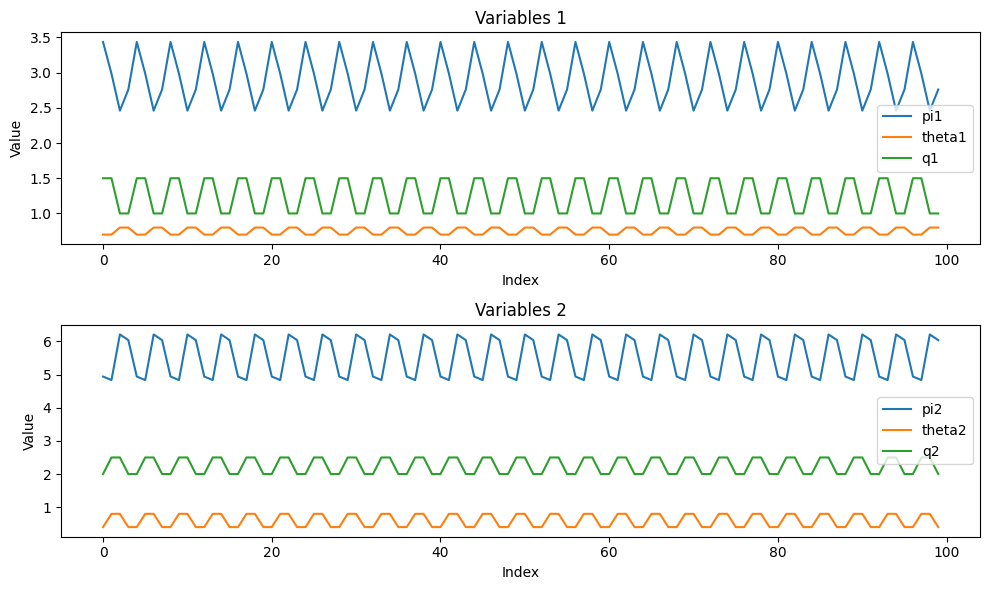

In [15]:
visualize_last_L(pi1_L, pi2_L, theta1_L, theta2_L, q1_L, q2_L)

Reproduction results

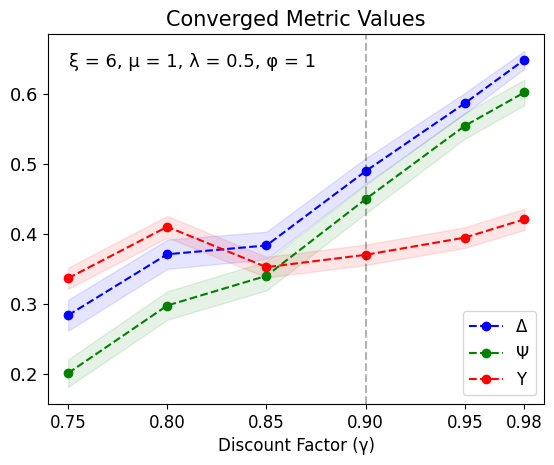

In [3]:
visualize_over_gamma(env, ["V4gamma075", "V4gamma08", "V3gamma085", "V3gamma09", "V3gamma095", "V4gamma098"], extra_space=0.04)

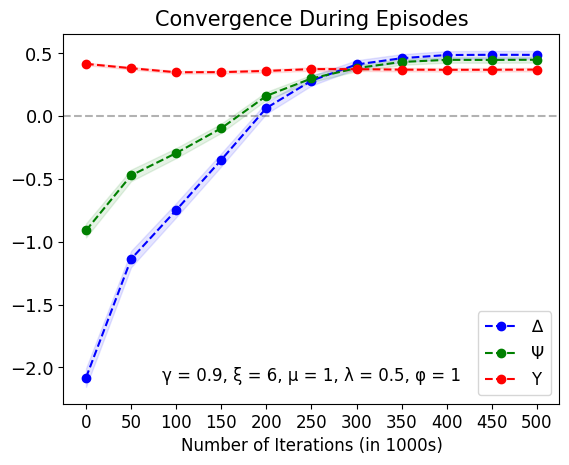

In [4]:
visualize_convergence_over_T(env, "V3gamma09", 0.9)

Verify high percentage of $\Delta_{min}$ below 0.

In [5]:
import os

current_dir = os.getcwd()
file_path = os.path.join(current_dir, '..', '..', 'data', 'simulation_data.h5')
file = h5py.File(file_path, 'r')
group = file["V4gamma098"]

pi1_L = group['pi1_L'][:]
pi2_L = group['pi2_L'][:]
q1_L = group['q1_L'][:]
q2_L = group['q2_L'][:]
theta1_L = group['theta1_L'][:]
theta2_L = group['theta2_L'][:]
Cycles = Cycle_Classifier(Environment(Lambda=0.5), pi1_L, pi2_L, theta1_L, theta2_L, q1_L, q2_L)

# Competitive profits are at 3.75, in this sample 17/30 episodes had an agent obtaining lower profits
for i in range(30):
    print(np.mean(pi1_L[i]), np.mean(pi2_L[i]))

4.265 4.325
4.990000000000002 3.7400000000000015
3.38 4.97
4.810000000000001 3.6650000000000005
3.6798999999999995 4.220649999999999
3.3899999999999992 4.64
4.61 4.350000000000001
4.41625 4.13875
3.8344 3.723750000000001
4.14 4.14
3.56 5.040000000000001
3.575 4.740000000000002
4.0675 4.552499999999999
5.003749999999998 3.5766499999999994
4.95 3.5099999999999985
4.175 4.214999999999997
4.34 4.560000000000001
4.7 3.8849999999999985
4.14 4.14
4.235 4.475000000000001
3.3650000000000015 5.14
4.186999999999999 3.4739999999999998
4.0249999999999995 4.77875
3.4374999999999996 5.243749999999999
3.350000000000002 5.384999999999999
4.115000000000002 4.515
5.21 3.524999999999998
4.959999999999999 3.7099999999999995
4.600000000000001 3.89
4.372199999999999 3.16925


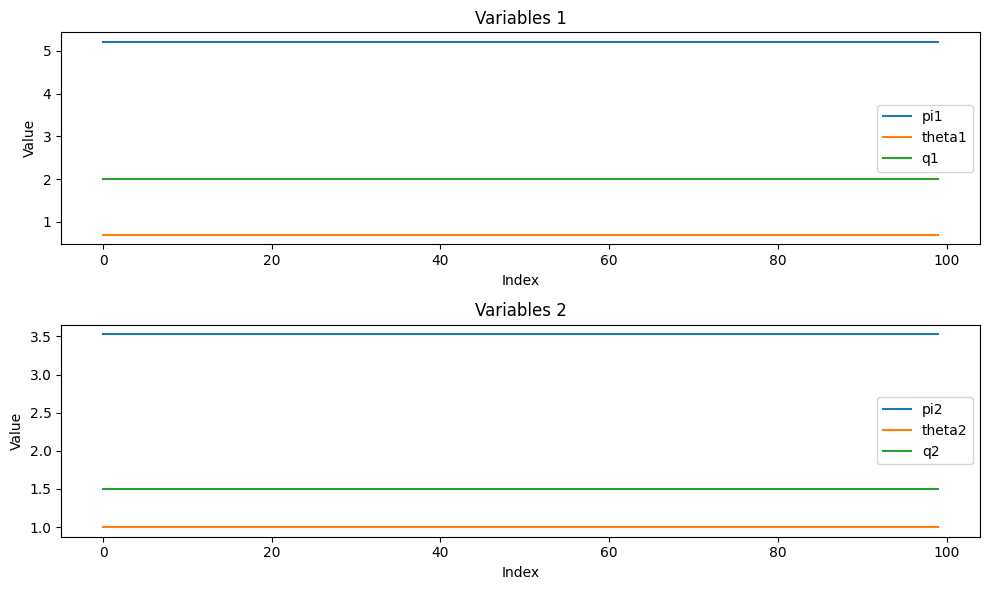

In [6]:
visualize_last_L(pi1_L[26], pi2_L[26], theta1_L[26], theta2_L[26], q1_L[26], q2_L[26])

In [7]:
theta1_L[26][0]

0.7

In [27]:
Action1 = Action(2, 0.7)
Action2 = Action(2, 0.5)
env.Pi(Action1, Action2)

(3.71, 3.95)

In [36]:
Br = None
cur = -float("inf")
for q in Qs:
    for theta in Thetas:    
        Action1 = Action(2, 0.7)
        Action2 = Action(q, theta)
        a1, a2 = env.Pi(Action1, Action2)
        if a2 > cur:
            cur = a2
            Br = Action2
Br  # Best response

Action(q=2.0, theta=0.5)

In [37]:
env.Pi(Action(2, 0.7), Action(q=2.0, theta=0.5))

(3.71, 3.95)

In [3]:
Cycles.most_found_cycle()

(((4.81, 3.665, 0.7, 0.6, 2.0, 1.5),), 25)